JAWABAN SOAL COMPFEST

**PROBLEM STATEMENT** : Bagaimana cara mengamati penyebaran infeksi Covid-19 di Indonesia. Untuk memecahkan permasalahan tersebut digunakan Data Covid-19 dunia : https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

# Import/ load library yang akan digunakan

In [158]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://github.com/farhannafily/Dataset_Covid/blob/main/covid_19_data.csv?raw=true'

df = pd.read_csv(url)
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [159]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


Memilih region Indonesia

In [160]:
df= df.loc[df['Country/Region'] == 'Indonesia']

df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
3114,3115,03/02/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3258,3259,03/03/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3421,3422,03/04/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3590,3591,03/05/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3760,3761,03/06/2020,NaN,Indonesia,2020-03-06T12:33:03,4.0,0.0,0.0


In [161]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
302674,302675,05/25/2021,NaN,Indonesia,2021-05-26 04:20:35,1786187.0,49627.0,1642074.0
303439,303440,05/26/2021,NaN,Indonesia,2021-05-27 04:20:59,1791221.0,49771.0,1645263.0
304204,304205,05/27/2021,NaN,Indonesia,2021-05-28 04:20:36,1797499.0,49907.0,1649187.0
304969,304970,05/28/2021,NaN,Indonesia,2021-05-29 04:20:41,1803361.0,50100.0,1654557.0
305734,305735,05/29/2021,NaN,Indonesia,2021-05-30 04:20:55,1809926.0,50262.0,1659974.0


# SUMMARY DATA 

Analisis Deskriptif Data

In [162]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,454.000000,4.540000e+02,454.000000,4.540000e+02
mean,137598.246696,5.841102e+05,17115.262115,4.987140e+05
std,93551.595600,6.046486e+05,16027.773149,5.472855e+05
min,3115.000000,2.000000e+00,0.000000,0.000000e+00
25%,48850.250000,4.817425e+04,2544.500000,1.934525e+04
50%,133065.000000,3.469545e+05,12212.000000,2.707560e+05
75%,219098.750000,1.131917e+06,31151.750000,9.245615e+05
max,305735.000000,1.809926e+06,50262.000000,1.659974e+06


Memunculkan informasi jumlah data pada setiap kolomnya

In [163]:
df.count()

SNo                454
ObservationDate    454
Province/State       0
Country/Region     454
Last Update        454
Confirmed          454
Deaths             454
Recovered          454
dtype: int64

**Analisis Korelasi antar kolom pada data**
bernilai positif maka data akan bergerak searah dan bernilai negatif berlaku sebaliknya


In [164]:
df.corr()

,SNo,Confirmed,Deaths,Recovered
SNo,1.000000,0.961392,0.975351,0.952031
Confirmed,0.961392,1.000000,0.998117,0.998637
Deaths,0.975351,0.998117,1.000000,0.995730
Recovered,0.952031,0.998637,0.995730,1.000000


Memeriksa apakah ada data outlier

In [165]:
angka = df.select_dtypes(include="number").columns.tolist()
kategori = df.select_dtypes(include="object").columns.tolist()

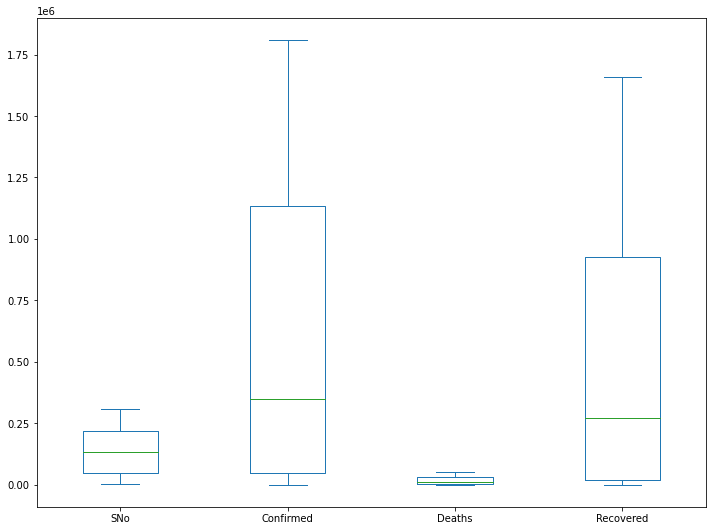

In [166]:
df[angka].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

Data yang diperiksa merupakan data bersifat angka, berdasarkan boxplot didapatkan tidak ada outlier pada data numerik

In [167]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
3114,3115,03/02/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3258,3259,03/03/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3421,3422,03/04/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3590,3591,03/05/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3760,3761,03/06/2020,NaN,Indonesia,2020-03-06T12:33:03,4.0,0.0,0.0


# **DATA CLEANSING**

Dikarenakan kolom province/state bernilai NaN, maka kolom lebih baik dihilangkan dari tabel

In [168]:
df.drop('Province/State', inplace = True, axis =1)
df.drop('Country/Region', inplace = True, axis =1)

In [169]:
df.head()

,SNo,ObservationDate,Last Update,Confirmed,Deaths,Recovered
3114,3115,03/02/2020,2020-03-02T18:03:04,2.0,0.0,0.0
3258,3259,03/03/2020,2020-03-02T18:03:04,2.0,0.0,0.0
3421,3422,03/04/2020,2020-03-02T18:03:04,2.0,0.0,0.0
3590,3591,03/05/2020,2020-03-02T18:03:04,2.0,0.0,0.0
3760,3761,03/06/2020,2020-03-06T12:33:03,4.0,0.0,0.0


In [170]:
df.tail()

,SNo,ObservationDate,Last Update,Confirmed,Deaths,Recovered
302674,302675,05/25/2021,2021-05-26 04:20:35,1786187.0,49627.0,1642074.0
303439,303440,05/26/2021,2021-05-27 04:20:59,1791221.0,49771.0,1645263.0
304204,304205,05/27/2021,2021-05-28 04:20:36,1797499.0,49907.0,1649187.0
304969,304970,05/28/2021,2021-05-29 04:20:41,1803361.0,50100.0,1654557.0
305734,305735,05/29/2021,2021-05-30 04:20:55,1809926.0,50262.0,1659974.0


# Exploratory Data Analysis

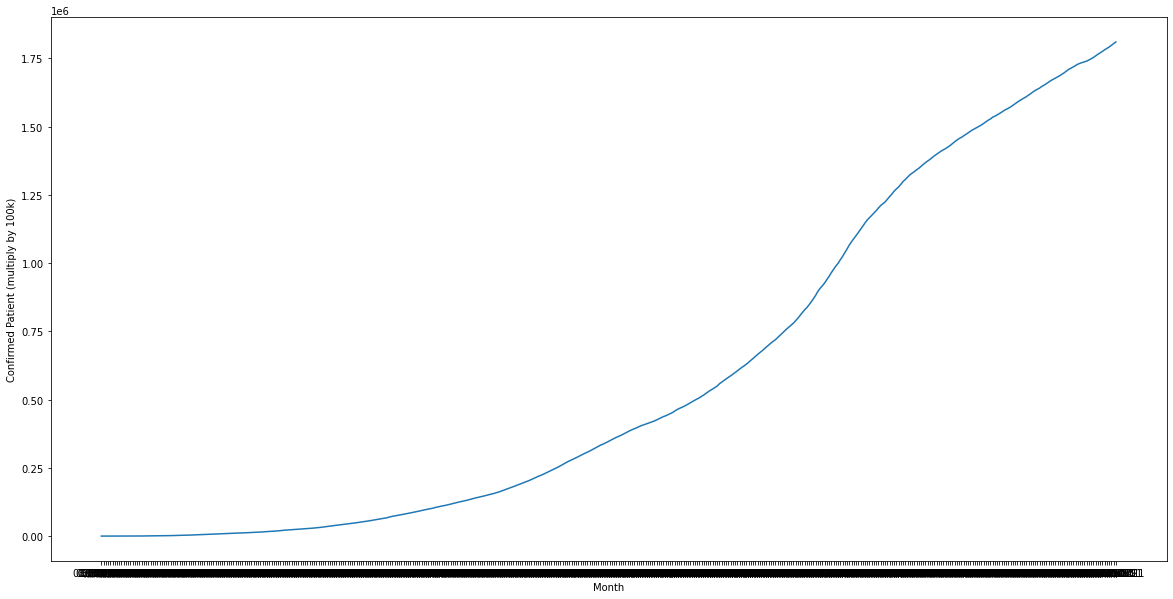

In [171]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Confirmed Patient (multiply by 100k)")
plt.plot(df['ObservationDate'],df['Confirmed'])

Plot Data yang meninggal akibat Covid-19

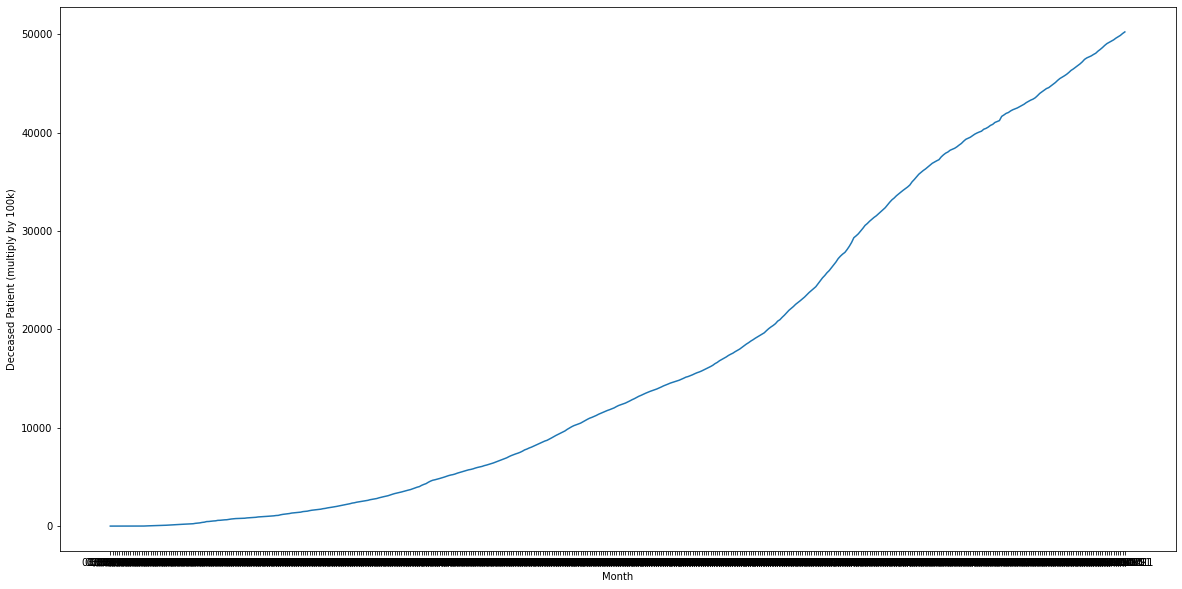

In [172]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Deceased Patient (multiply by 100k)")
plt.plot(df['ObservationDate'],df['Deaths'])

Plot Data yang sembuh dari Covid-19

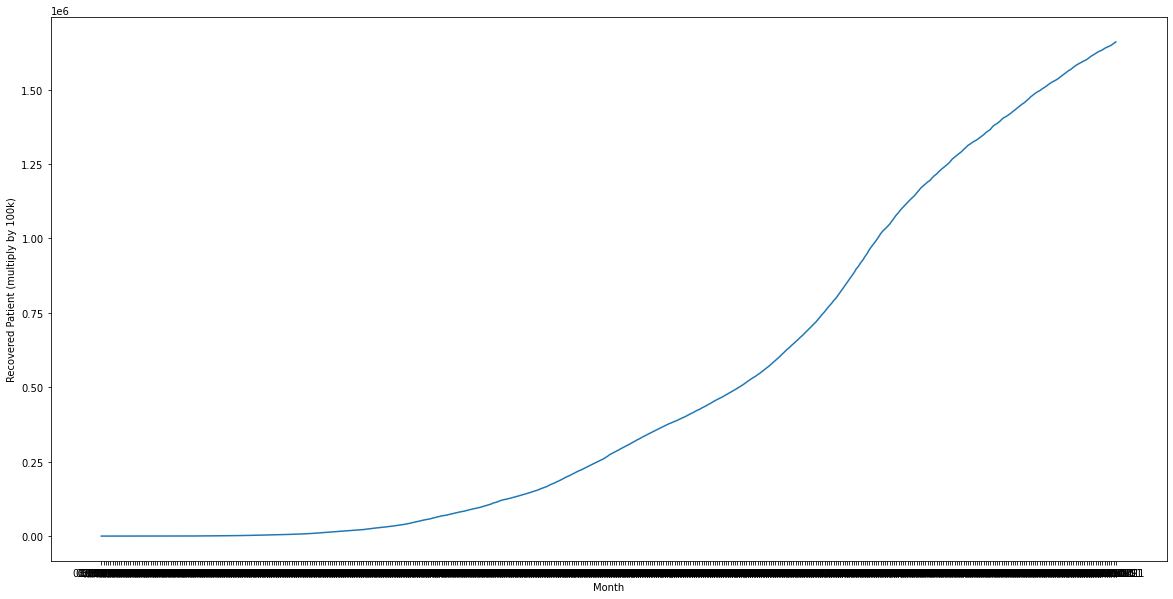

In [173]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Recovered Patient (multiply by 100k)")
plt.plot(df['ObservationDate'],df['Recovered'])

Berdasarkan bentuk distribusi data yang didapatkan mendekati sigmoid, metode yang paling cocok dipakai adalah metode regresi logistik

#Modelling Data

In [174]:
df = df.loc[:,['ObservationDate','Confirmed']]
format_for_time = '%m/%d/%Y'
tanggal = df['ObservationDate']
df['ObservationDate'] = tanggal.map(lambda x : (datetime.strptime(x, format_for_time) - datetime.strptime("03/02/2020", format_for_time)).days)

In [175]:
x = df['ObservationDate']
y = df['Confirmed']



Rumus yang dipakai adalah 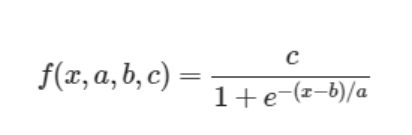

dimana

a = infection speed,
b = day with maximum infection occured,
c = total number of recorded infected people in the end of infection

In [176]:
def logreg(x,a,b,c):
  return c/(1+np.exp(-(x-b)/a))

In [177]:
df['ObservationDate'].head()

3114    0
3258    1
3421    2
3590    3
3760    4
Name: ObservationDate, dtype: int64

In [178]:
df.head()

,ObservationDate,Confirmed
3114,0,2.0
3258,1,2.0
3421,2,2.0
3590,3,2.0
3760,4,4.0


In [179]:
print(x)

3114        0
3258        1
3421        2
3590        3
3760        4
         ... 
302674    449
303439    450
304204    451
304969    452
305734    453
Name: ObservationDate, Length: 454, dtype: int64


In [180]:
print(y)

3114            2.0
3258            2.0
3421            2.0
3590            2.0
3760            4.0
            ...    
302674    1786187.0
303439    1791221.0
304204    1797499.0
304969    1803361.0
305734    1809926.0
Name: Confirmed, Length: 454, dtype: float64


Menentukan nilai parameter dengan curve_fit

In [181]:
fit = curve_fit(logreg,x,y)

In [182]:
A,B= fit

In [183]:
A

array([6.05871763e+01, 3.30943975e+02, 2.04500075e+06])

In [184]:
a = A[0]
b = A[1]
c = A[2]

Menentukan hari terakhir infeksi dengan menggunakan fsolve

In [185]:
from scipy.optimize import fsolve

In [186]:
last_day = int(fsolve(lambda x : logreg(x,a,b,c) - int(c),b))
last_day

1228

**Plotting grafik dan menghitung koefisien determinasi**

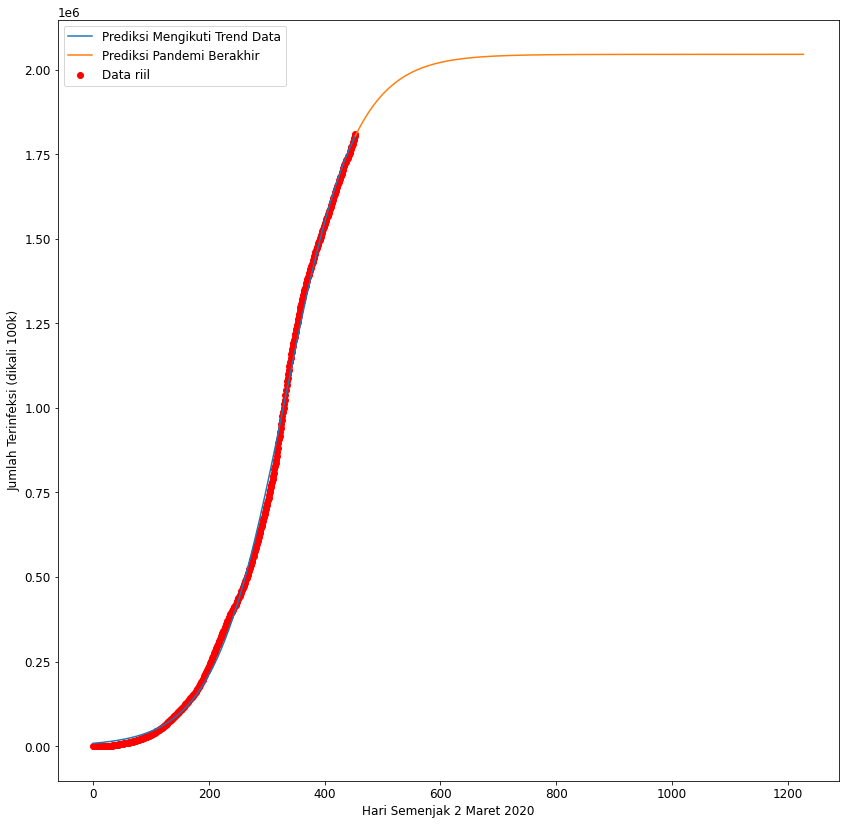

In [187]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [14, 14]
plt.rc('font', size=12)# Real data
plt.scatter(x,y,label="Data riil",color="red")

# Predicted logistic curve
plt.plot(x, [logreg(i,a,b,c) for i in x], label="Prediksi Mengikuti Trend Data" )
plt.plot(pred_x, [logreg(i,a,b,c) for i in pred_x], label="Prediksi Pandemi Berakhir" )

plt.legend()
plt.xlabel("Hari Semenjak 2 Maret 2020")
plt.ylabel("Jumlah Terinfeksi (dikali 100k)")
plt.show()

In [188]:
print(pred_x)

[453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652,

Menghitung koefisien determinasi dengan rumus
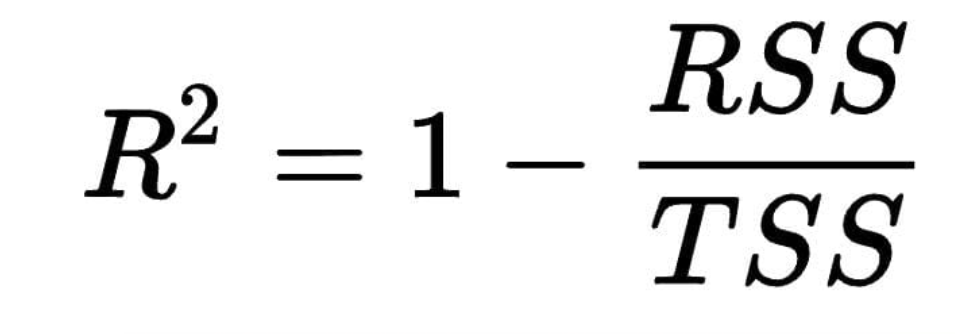

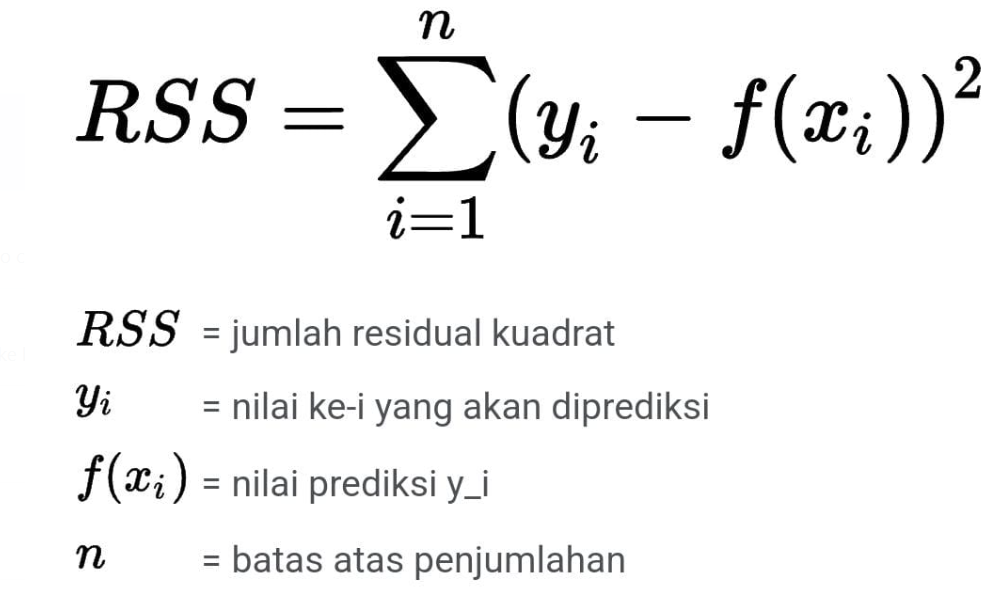

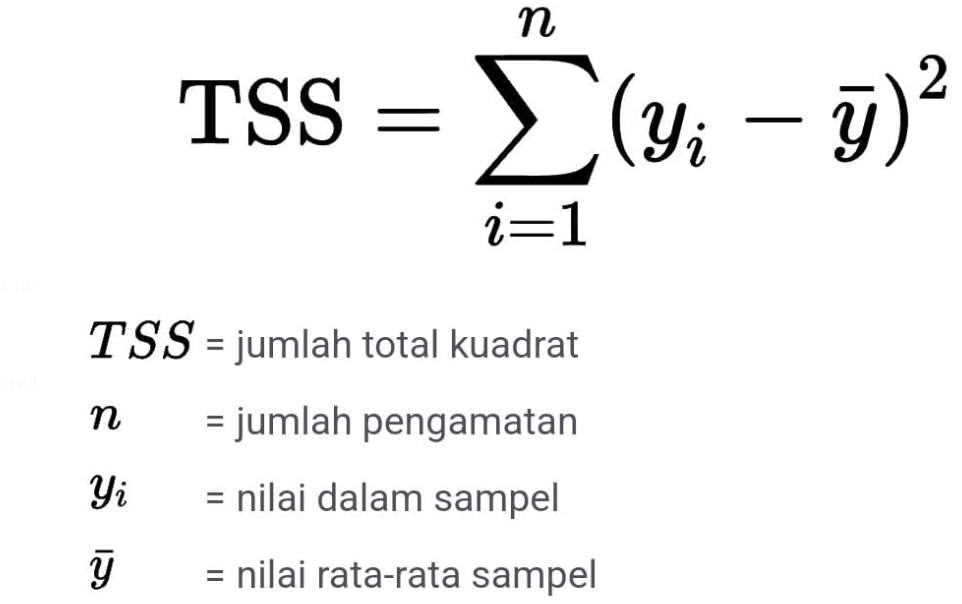

In [189]:
pred_y = [logreg(i,a,b,c) for i in x]


rss=(np.subtract(y,pred_y)**2).sum()
tss=(np.subtract(y,np.mean(y))**2).sum()
r2=1-(rss/tss)
print("R^2 = "+ str(r2))

ms_error=mean_squared_error(y,pred_y)
print("MSE = "+ str(ms_error))

R^2 = 0.9983016294869343
MSE = 619556433.6397043


# **CONCLUSION :** dari pengamatan didapatkan bahwa penyebaran infeksi akan berlangsung sampai 1227 hari semenjak 2 Maret 2020. hasil ini akan berubah dipengaruhi dengan kebijakan pemerintah dan aspek tidak terduga lainnya

# Referensi


Jasaputra, D.K. (2008). Metodologi Penelitian Biomedis. Bandung: DSU
